Используя датасеты о продуктах и их продажах посчитайте корреляции:
* Пирсона
* Спирмена
* Мэтьюса
* Крамера

Ход работы:
* Прочтите данные о продажах и продуктах
* Соедините таблицы друг с другом по id продукта
* Посчитайте корреляцию Спирмена временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Посчитайте корреляцию Пирсона временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Найдите наиболее коррелирующий товар с American Chicken Hot Dogs по значению корреляции Спирмена и Пиарсона
* Постройте график зависимости продаж American Chicken Hot Dogs от найденного товара (scatterplot) и постройте два графика 1) зависимости продаж American Chicken Hot Dogs от времени 2) зависимости продаж найденного товара от времени (lineplot).
* Найдите корреляцию Мэтьюса между recyclable_package и low_fat
* Постройте гистограммы recyclable_package и low_fat.
* Найдите корреляцию Крамера между store_id и brand_name. Есть ли корреляция между этими признаками?
* Визуализируйте зависимость store_id и brand_name. Тут подумайте, как это можно сделать.

In [19]:
from sklearn.metrics import matthews_corrcoef # matthews
from scipy.stats.contingency import association # cramer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df_products = pd.read_csv('foodmart.products.tsv', sep='\t')
df_sales = pd.read_csv('foodmart.sales.tsv', sep='\t')

df_products.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.7,21.90,19.20


In [21]:
df_sales.head()

,product_id,store_id,date,sales
0,4,6,1997-01-01,4
1,25,6,1997-01-01,3
2,48,6,1997-01-01,3
3,76,6,1997-01-01,4
4,119,6,1997-01-01,3


In [22]:
df = pd.merge(df_sales, df_products, on='product_id', how='inner')
df.head()

,product_id,store_id,date,sales,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,4,6,1997-01-01,4,19,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.90,18.90,7.93
1,25,6,1997-01-01,3,58,Blue Label,Blue Label Chicken Noodle Soup,62032982707,1.55,9.48,8.47,True,True,21,10,4.98,4.71,22.40
2,48,6,1997-01-01,3,11,Club,Club String Cheese,76026721596,1.88,6.31,3.30,True,True,17,7,5.22,18.70,11.20
3,76,6,1997-01-01,4,8,Red Spade,Red Spade Sliced Chicken,62054644227,1.69,18.10,17.10,False,True,4,7,14.60,13.50,3.42
4,119,6,1997-01-01,3,79,Faux Products,Faux Products Extra Moisture Shampoo,35068821310,2.28,20.10,19.10,False,False,7,12,7.86,8.33,14.70


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83391 entries, 0 to 83390
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          83391 non-null  int64  
 1   store_id            83391 non-null  int64  
 2   date                83391 non-null  object 
 3   sales               83391 non-null  int64  
 4   product_class_id    83391 non-null  int64  
 5   brand_name          83391 non-null  object 
 6   product_name        83391 non-null  object 
 7   SKU                 83391 non-null  int64  
 8   SRP                 83391 non-null  float64
 9   gross_weight        83391 non-null  float64
 10  net_weight          83391 non-null  float64
 11  recyclable_package  83391 non-null  bool   
 12  low_fat             83391 non-null  bool   
 13  units_per_case      83391 non-null  int64  
 14  cases_per_pallet    83391 non-null  int64  
 15  shelf_width         83391 non-null  float64
 16  shel

In [24]:
sparse_sales = pd.pivot_table(df, values='sales', index=['date', 'store_id'],
                     columns=['product_name'], fill_value = 0)

sparse_sales.head()

product_name         ADJ Rosy Sunglasses  Akron City Map  \
date       store_id                                        
1997-01-01 6                         0.0             0.0   
           14                        0.0             0.0   
1997-01-02 11                        0.0             0.0   
           23                        0.0             0.0   
1997-01-03 7                         0.0             0.0   

product_name         Akron Eyeglass Screwdriver  American Beef Bologna  \
date       store_id                                                      
1997-01-01 6                                0.0                    0.0   
           14                               0.0                    0.0   
1997-01-02 11                               0.0                    0.0   
           23                               0.0                    0.0   
1997-01-03 7                                0.0                    0.0   

product_name         American Chicken Hot Dogs  American Cole Slaw  \
date       store_id                                                  
1997-01-01 6                               0.0                 0.0   
           14                              0.0                 0.0   
1997-01-02 11                              0.0                 0.0   
           23                              0.0                 0.0   
1997-01-03 7                               0.0                 0.0   

product_name         American Corned Beef  American Foot-Long Hot Dogs  \
date       store_id                                                      
1997-01-01 6                          0.0                          0.0   
           14                         0.0                          0.0   
1997-01-02 11                         0.0                          0.0   
           23                         0.0                          0.0   
1997-01-03 7                          0.0                          0.0   

product_name         American Low Fat Bologna  American Low Fat Cole Slaw  \
date       store_id                                                         
1997-01-01 6                              0.0                         0.0   
           14                             0.0                         0.0   
1997-01-02 11                             0.0                         0.0   
           23                             0.0                         0.0   
1997-01-03 7                              0.0                         0.0   

product_name         ...  Washington Apple Juice  Washington Berry Juice  \
date       store_id  ...                                                   
1997-01-01 6         ...                     0.0                     0.0   
           14        ...                     0.0                     0.0   
1997-01-02 11        ...                     0.0                     0.0   
           23        ...                     0.0                     0.0   
1997-01-03 7         ...                     0.0                     4.0   

product_name         Washington Cola  Washington Cranberry Juice  \
date       store_id                                                
1997-01-01 6                     0.0                         0.0   
           14                    0.0                         0.0   
1997-01-02 11                    0.0                         0.0   
           23                    0.0                         0.0   
1997-01-03 7                     0.0                         0.0   

product_name         Washington Cream Soda  Washington Diet Cola  \
date       store_id                                                
1997-01-01 6                           4.0                   0.0   
           14                          0.0                   0.0   
1997-01-02 11                          0.0                   0.0   
           23                          0.0                   0.0   
1997-01-03 7                           0.0                   0.0   

product_name         Wa

In [25]:
corr_spearman = sparse_sales.corr(method='spearman')
corr_pearson = sparse_sales.corr(method='pearson')

np.fill_diagonal(corr_spearman.values, np.nan)
np.fill_diagonal(corr_pearson.values, np.nan)

corr_spearman.head()

product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
product_name,,,,,,,,,,,,,,,,,,,,,
ADJ Rosy Sunglasses,NaN,0.097969,0.001993,0.041981,0.050371,-0.033882,-0.007844,0.077134,0.019108,-0.007614,...,0.033237,0.112359,0.076139,0.018318,0.005265,0.018996,0.018471,0.099764,0.039577,0.018928
Akron City Map,0.097969,NaN,0.022436,0.098703,0.030165,0.030935,0.031788,-0.002137,0.047911,0.098667,...,0.005623,0.030795,0.039333,-0.001983,-0.053719,0.013590,0.040211,0.022333,0.090423,0.055622
Akron Eyeglass Screwdriver,0.001993,0.022436,NaN,-0.036888,0.029858,0.076507,-0.005579,0.123704,0.052521,0.088301,...,-0.006781,0.004975,0.059180,0.067207,0.046000,-0.016040,-0.003019,0.040994,-0.001277,0.108524
American Beef Bologna,0.041981,0.098703,-0.036888,NaN,0.027961,-0.032650,0.027374,-0.016565,-0.041241,0.070463,...,0.009394,0.063805,-0.057211,-0.022645,0.005515,0.092713,-0.007196,0.059298,0.059979,0.040561
American Chicken Hot Dogs,0.050371,0.030165,0.029858,0.027961,NaN,0.014187,-0.000718,0.051069,0.048408,0.058423,...,0.082403,-0.019304,0.070678,0.071697,0.036806,0.062295,-0.021510,-0.007004,0.105569,0.000033


In [26]:
target = 'American Chicken Hot Dogs'

most_correlated_spearman = corr_spearman[target].idxmax()
most_correlated_spearman_value = corr_spearman[target][most_correlated_spearman]
print("Spearman:", most_correlated_spearman, most_correlated_spearman_value)

most_correlated_pearson = corr_pearson['American Chicken Hot Dogs'].idxmax()
most_correlated_pearson_value = corr_pearson[target][most_correlated_pearson]
print("Pearson:", most_correlated_pearson, most_correlated_pearson_value)

if most_correlated_spearman_value > most_correlated_pearson_value:
    most_corr_product = most_correlated_spearman
else:
    most_corr_product = most_correlated_pearson

Spearman: Great Cranberry Muffins 0.1981052950789763
Pearson: Mighty Good Monthly Home Magazine 0.24026934048270548


### Mighty Good Monthly Home Magazine наиболее коррелирующий товар по значению.

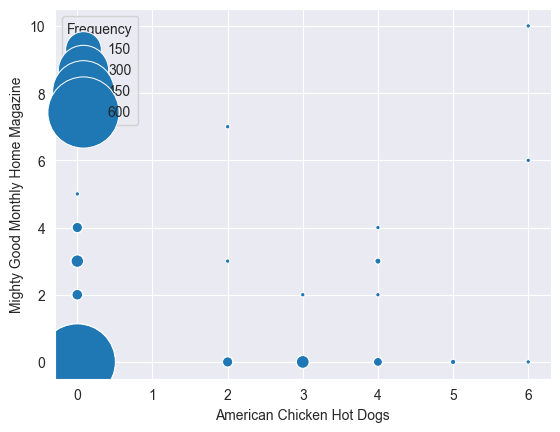

In [27]:
sparse_sales['Frequency'] = sparse_sales.groupby(['American Chicken Hot Dogs', most_corr_product]).transform('size')
scatter = sns.scatterplot(x=sparse_sales[target], y=sparse_sales[most_corr_product], size=sparse_sales['Frequency'], sizes=(10, 3000))

<Axes: >

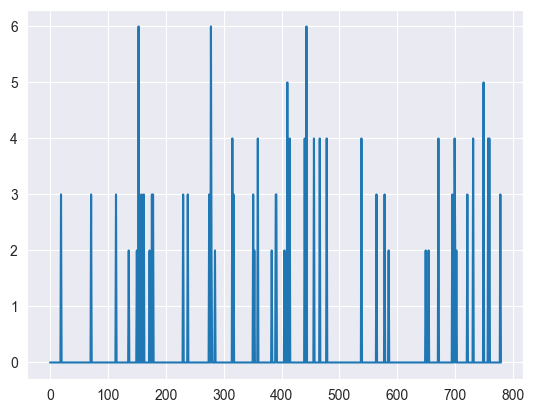

In [28]:
sns.lineplot(data=np.array(sparse_sales[target]))

<Axes: >

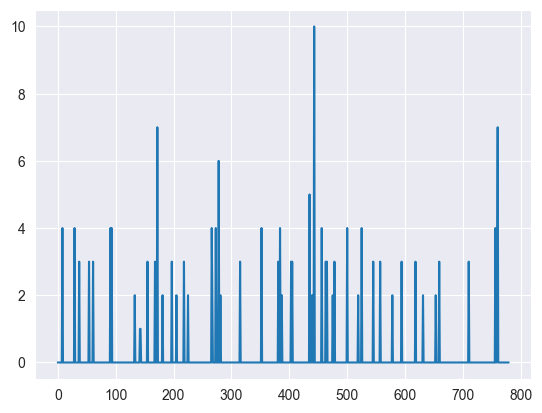

In [30]:
sns.lineplot(data=np.array(sparse_sales[most_corr_product]))

In [31]:
matthews_corrcoef(df['recyclable_package'], df['low_fat'])


-0.022364293265823097

<Axes: xlabel='recyclable_package', ylabel='count'>

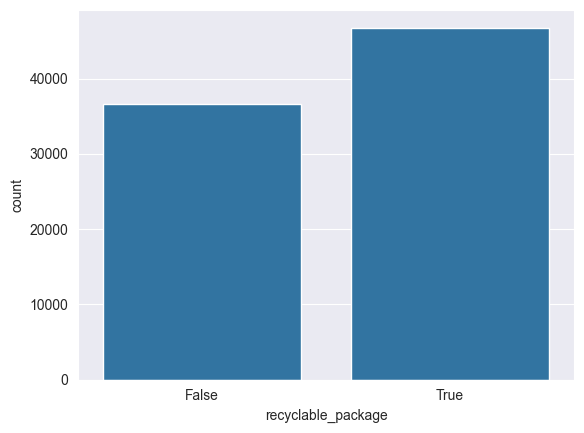

In [32]:
sns.countplot(data=df, x='recyclable_package')

<Axes: xlabel='low_fat', ylabel='count'>

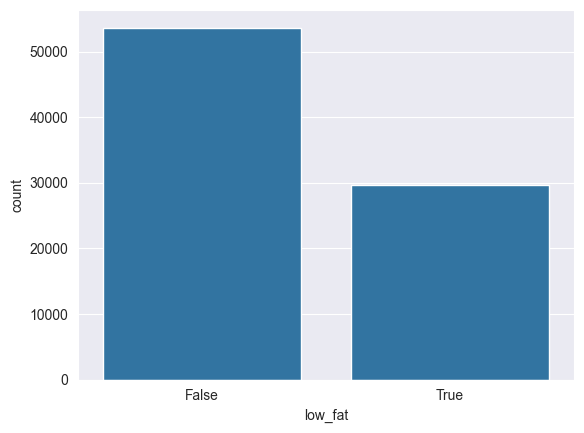

In [33]:
sns.countplot(data=df, x='low_fat')

In [34]:
confusion_matrix = pd.crosstab(df['store_id'], df['brand_name'])

cramer = association(confusion_matrix, method='cramer')
print(cramer)

0.0343024046787291


### Отсутствует корреляция между именем бренда и id магазина 

<Axes: xlabel='brand_name', ylabel='store_id'>

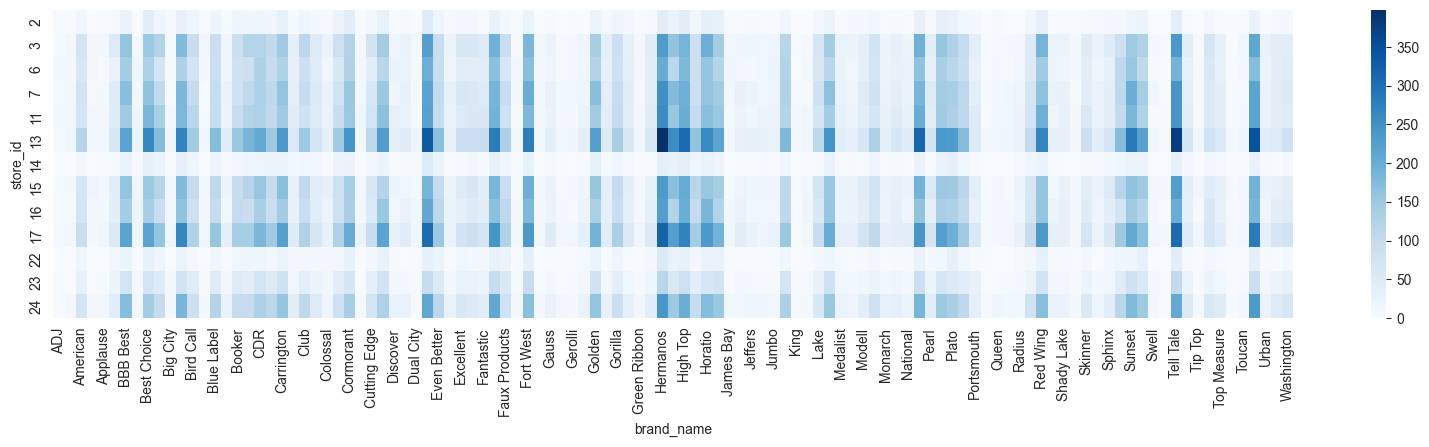

In [35]:
plt.figure(figsize=(20, 4))
sns.heatmap(data=confusion_matrix, cmap="Blues")